# 本程序是对玻璃数据库的数据进行标准化处理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import math

In [2]:
file_path = r'C:\Users\zhang\Desktop\桌面资料\论文\迁移学习\数据库\new_m.csv'

In [3]:
full_data = pd.read_csv(file_path, encoding='latin-1',dtype='str')

In [4]:
full_data.shape

(11557, 230)

In [5]:
full_data.iloc[2,2]

' '

In [6]:
# 使用嵌套循环遍历每一个元素  
# 某一行带有*则标注为inf
for row_index in range(full_data.shape[0]):
    for column_index in range(full_data.shape[1]):
        element = full_data.iloc[row_index,column_index]
        # 如果这个是str数据
        if isinstance(element, str):
            # 某个位置带有*
            if element.strip()=='*':
                # 先标记把
                element  = float('inf')
            elif element.strip() == '':
                element = 0.0
            else:
                element = float(element)
            # 再取出nan
            if math.isnan(element):
                element=0.0
            # 赋值    
            full_data.iloc[row_index,column_index] = element

In [7]:
full_data.head

<bound method NDFrame.head of        SiO2  B2O3  Al2O3  MgO  CaO  BaO  Li2O  Na2O  K2O  Cu2O  ...  GeS  AlN  \
0       0.0   0.0    0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0  0.0   
1       0.0   0.0    0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0  0.0   
2       0.0   0.0    0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0  0.0   
3       0.0   0.0    0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0  0.0   
4       0.0   0.0    0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  ...  0.0  0.0   
...     ...   ...    ...  ...  ...  ...   ...   ...  ...   ...  ...  ...  ...   
11552  68.5   0.0   13.5  8.5  8.5  0.0   0.0   0.0  0.0   0.0  ...  0.0  0.0   
11553  68.2   0.0   14.3  7.0  8.5  0.0   0.0   0.0  0.0   0.0  ...  0.0  0.0   
11554  68.2   0.5   14.3  7.8  8.7  0.0   0.0   0.0  0.0   0.0  ...  0.0  0.0   
11555  68.3   0.0   13.5  9.1  8.6  0.0   0.0   0.0  0.0   0.0  ...  0.0  0.0   
11556  68.6   0.0   14.3  6.0  9.0  0.0   0.0   0.0  0.0   0.0  ...  0.0  0.0  

In [8]:
full_data.columns

Index([' SiO2', ' B2O3', ' Al2O3', ' MgO', ' CaO', ' BaO', ' Li2O', ' Na2O',
       ' K2O', ' Cu2O',
       ...
       ' GeS', ' AlN', ' Si3N4', ' BN', ' TiO', ' Mg3N2', ' Na2B4O7',
       ' Density at RT ( g/cm3 )', ' Expansion Coeff (Typical) ( 10-7/K )',
       ' Glass Transition Tg (Typical) ( C )'],
      dtype='object', length=230)

In [9]:
# 删除全为0的行或包含inf的行

full_data = full_data[~full_data.isin([np.inf]).any(axis=1)]
# 删除组分全为0的行
full_data = full_data[~(full_data.iloc[:, :-3] == 0).all(axis=1)]
# 删除最后三列中至少有一个元素为零的行
full_data = full_data[~(full_data.iloc[:, -3:] == 0).any(axis=1)]

In [10]:
full_data.shape

(10066, 230)

In [11]:
full_data.columns

Index([' SiO2', ' B2O3', ' Al2O3', ' MgO', ' CaO', ' BaO', ' Li2O', ' Na2O',
       ' K2O', ' Cu2O',
       ...
       ' GeS', ' AlN', ' Si3N4', ' BN', ' TiO', ' Mg3N2', ' Na2B4O7',
       ' Density at RT ( g/cm3 )', ' Expansion Coeff (Typical) ( 10-7/K )',
       ' Glass Transition Tg (Typical) ( C )'],
      dtype='object', length=230)

In [12]:
# 创建一个布尔DataFrame，表示每个元素是否为0
non_zero_mask = full_data.iloc[:, -3:].ne(0)

# 统计每列中不为0的元素数量
non_zero_counts = non_zero_mask.sum()

# 找出不为0的元素最多的列
most_non_zero_column = non_zero_counts.idxmax()

print("每列不为0的元素数量:")
print(non_zero_counts)

每列不为0的元素数量:
 Density at RT ( g/cm3 )                 10066
 Expansion Coeff (Typical) ( 10-7/K )    10066
 Glass Transition Tg (Typical) ( C )     10066
dtype: int64


In [13]:
full_data.to_csv('m3.csv',index=False)

In [14]:
full_data.shape

(10066, 230)

In [15]:
len(full_data.columns)

230

In [16]:
# 将nan转为0.0
for i in range(full_data.shape[0]):
    for j in range(full_data.shape[1]):
        temp = full_data.iloc[i][j]
        if math.isnan(temp):
            full_data.iloc[i][j] = 0.0

In [17]:
# 再检查一遍有没有nan
for i in full_data:
    for j in full_data[i]:
        if math.isnan(j):
            print(j)

In [18]:
full_data.columns[-4]

' Na2B4O7'

In [19]:
# 所有组分的名称
component_col = full_data.columns[0:-3]

In [20]:
component_col

Index([' SiO2', ' B2O3', ' Al2O3', ' MgO', ' CaO', ' BaO', ' Li2O', ' Na2O',
       ' K2O', ' Cu2O',
       ...
       ' Ga2S3', ' Sb2S3', ' B2S3', ' GeS', ' AlN', ' Si3N4', ' BN', ' TiO',
       ' Mg3N2', ' Na2B4O7'],
      dtype='object', length=227)

In [21]:
# 再根据特征筛选

# 创建一个布尔索引，表示列中的值大于100或小于10
condition = (full_data[' Density at RT ( g/cm3 )'] > 100) | (full_data[' Density at RT ( g/cm3 )'] < 1)

# 使用布尔索引来删除满足条件的行
full_data = full_data[~condition]


In [22]:
full_data.shape

(10057, 230)

In [23]:
# 列值
col_count = 10057

# 要构建元素周期表的一个列表，将full——data中的值转换到另一个表中

In [24]:
periodic_table = ('H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne',
                  'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca',
                  'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn',
                  'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr',
                  'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 
                  'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd',
                  'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb',
                  'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg',
                  'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th',
                  'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 
                  'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds',
                  'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og')

In [25]:
len(periodic_table)

118

In [26]:
# 创建一个元素名称为键，初始值为0的字典
element_dict = {element: np.zeros(col_count) for element in periodic_table}

In [27]:
component_col[:5]

Index([' SiO2', ' B2O3', ' Al2O3', ' MgO', ' CaO'], dtype='object')

In [28]:
component_col[0][0]

' '

In [29]:
# 使用正则表达式切分字符串，忽略空格
re.split(r'(?=[A-Z0-9])|[\s]+', component_col[0].strip())

['', 'Si', 'O', '2']

In [30]:
re.split(r'(?=[A-Z0-9])|[\s\t]+',component_col[0])

['', '', 'Si', 'O', '2']

In [31]:
# 然后按照列遍历  只遍历组分列
for column_name in full_data.columns[0:-3]:
    temp_list = re.split(r'(?=[A-Z0-9])|[\s\t]+',column_name.strip())
    temp_list = [temp for temp in temp_list if temp!='']
    # 遍历每一列 然后给字典的对应位置加上计量单位
    print(column_name)
    for i in range(len(temp_list)):
        
        #print(temp_list[i])
        
        # 如果是数字，直接跳过
        if '0'<=temp_list[i]<='9':
            #print('00')
            continue
            
        # 如果下一位越界了，或者不是数字,就直接加字典上去
        if (i+1)>=len(temp_list) or (not ('0'<=temp_list[i+1]<='9')):
            #print('1')
            data_array =  np.array(full_data[column_name].values, dtype=float)
            #print(data_array.shape)
            element_dict[temp_list[i]] += data_array
            
        else: # 如果下一位是数字，乘上再加
            #print('2')
            data_array =  np.array(full_data[column_name].values, dtype=float)
            element_dict[temp_list[i]] += data_array * float(temp_list[i+1])
        #print(temp_list[i])
        # 检查数据
#         for j in temp_list[i]:
#             if j!=0:
#                 print(j)

 SiO2
 B2O3
 Al2O3
 MgO
 CaO
 BaO
 Li2O
 Na2O
 K2O
 Cu2O
 Rb2O
 Ag2O
 Cs2O
 Tl2O
 BeO
 MnO
 FeO
 CoO
 NiO
 CuO
 ZnO
 SrO
 CdO
 PbO
 SnO
 Cr2O3
 Fe2O3
 Ga2O3
 As2O3
 Y2O3
 In2O3
 Sb2O3
 La2O3
 Nd2O3
 Gd2O3
 Bi2O3
 Co2O3
 Sc2O3
 Co3O4
 Ce2O3
 Fe3O4
 TiO2
 MnO2
 GeO2
 ZrO2
 CeO2
 SnO2
 TeO2
 P2O5
 V2O5
 Nb2O5
 Ta2O5
 HfO2
 Nb2O3
 SO3
 MoO3
 WO3
 CdS
 GeS2
 OH
 Sm2O3
 Eu2O3
 Tb2O3
 Dy2O3
 Ho2O3
 Er2O3
 Yb2O3
 Pr2O3
 Pr6O11
 ThO2
 U3O8
 Ni2O3
 CdSe
 CdTe
 LiF
 NaF
 KF
 RbF
 CsF
 BeF2
 MgF2
 CaF2
 SrF2
 BaF2
 MnF2
 CuF2
 ZnF2
 CdF2
 SnF2
 PbF2
 ScF3
 YF3
 CrF3
 AlF3
 GaF3
 InF3
 LaF3
 CeF3
 NdF3
 GdF3
 YbF3
 LuF3
 TiF4
 ZrF4
 HfF4
 ThF4
 KHF2
 DyF3
 HoF3
 CoF2
 FeF3
 SmF3
 NiF2
 TbF3
 EuF3
 LiCl
 NaCl
 KCl
 RbCl
 CsCl
 MgCl2
 CaCl2
 SrCl2
 BaCl2
 ZnCl2
 CdCl2
 SnCl2
 PbCl2
 CsBr
 CdBr2
 PbBr2
 AgBr
 CsI
 AgI
 CuI
 TmF3
 ErF3
 PrF3
 Na2S
 P2S5
 Li
 B
 C
 N
 O
 F
 Na
 Mg
 Al
 Si
 P
 S
 Cl
 K
 Ca
 Ti
 V
 Cr
 Mn
 Fe
 Co
 Ni
 Cu
 Ga
 Ge
 As
 Se
 Br
 Rb
 Sr
 Y
 Zr
 Nb
 Pd
 Cd
 In
 Sb
 Te
 I
 Cs
 B

In [32]:
element_dict

{'H': array([0., 0., 0., ..., 0., 0., 0.]),
 'He': array([0., 0., 0., ..., 0., 0., 0.]),
 'Li': array([0., 0., 0., ..., 0., 0., 0.]),
 'Be': array([0., 0., 0., ..., 0., 0., 0.]),
 'B': array([0., 0., 0., ..., 1., 0., 0.]),
 'C': array([0., 0., 0., ..., 0., 0., 0.]),
 'N': array([0., 0., 0., ..., 0., 0., 0.]),
 'O': array([332.9, 308. , 281.3, ..., 197.8, 195.3, 197.2]),
 'F': array([0., 0., 0., ..., 0., 0., 0.]),
 'Ne': array([0., 0., 0., ..., 0., 0., 0.]),
 'Na': array([0., 0., 0., ..., 0., 0., 0.]),
 'Mg': array([0. , 0. , 0. , ..., 7.8, 9.1, 6. ]),
 'Al': array([ 0. ,  0. ,  0. , ..., 28.6, 27. , 28.6]),
 'Si': array([ 0. ,  0. ,  0. , ..., 68.2, 68.3, 68.6]),
 'P': array([88.6, 72. , 54.2, ...,  0. ,  0. ,  0. ]),
 'S': array([0., 0., 0., ..., 0., 0., 0.]),
 'Cl': array([0., 0., 0., ..., 0., 0., 0.]),
 'Ar': array([0., 0., 0., ..., 0., 0., 0.]),
 'K': array([0., 0., 0., ..., 0., 0., 0.]),
 'Ca': array([0. , 0. , 0. , ..., 8.7, 8.6, 9. ]),
 'Sc': array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
for i in element_dict:
    for j in element_dict[i]:
        if math.isnan(j):
            print('oooo')

In [34]:
# 创建元素字典
count_ele_dict = {element:0 for element in periodic_table}

In [35]:
# 看元素非常少的有哪些
for i in element_dict:
    #print(i)
    temp_list = element_dict[i]
    count_ele_dict[i] = np.sum(temp_list)
    #print(np.sum(temp_list))
    if np.sum(temp_list)<=1 and np.sum(temp_list)!=0:
        print(i)

H
Au


In [36]:
# 看元素分布 取log10
for i in element_dict:
    temp_list = element_dict[i]
    count_ele_dict[i] = np.log10(np.sum(temp_list))if np.sum(temp_list)>=1 else 0

In [37]:
print(count_ele_dict)

{'H': 0, 'He': 0, 'Li': 4.574539961235142, 'Be': 2.66700441736658, 'B': 5.226980870395823, 'C': 0.3979400086720376, 'N': 3.1741616062880618, 'O': 6.30584367888922, 'F': 4.828953364964661, 'Ne': 0, 'Na': 4.988068044114781, 'Mg': 4.516407649693303, 'Al': 5.019636149819354, 'Si': 5.600965167570817, 'P': 5.056460595694592, 'S': 4.4206899596921705, 'Cl': 3.620812485741877, 'Ar': 0, 'K': 4.514563959617141, 'Ca': 4.590146447549066, 'Sc': 1.9571281976768131, 'Ti': 4.016560150089017, 'V': 4.228266393976261, 'Cr': 1.9690600402653193, 'Mn': 3.078822817067172, 'Fe': 3.7323926125762816, 'Co': 3.259557405681283, 'Ni': 2.709528794168634, 'Cu': 3.250472505282878, 'Zn': 4.453751537521689, 'Ga': 3.809752242840423, 'Ge': 4.4952055112136575, 'As': 3.8699727245022846, 'Se': 3.8792416815290442, 'Br': 2.7824224552394226, 'Kr': 0, 'Rb': 2.7054360465852505, 'Sr': 3.940000330667824, 'Y': 3.475124708441621, 'Zr': 4.113026632191144, 'Nb': 4.116514765798383, 'Mo': 3.4367162025165285, 'Tc': 0, 'Ru': 0, 'Rh': 0, 'Pd

In [38]:
max_count = 0
for i in count_ele_dict:
    max_count = count_ele_dict[i] if count_ele_dict[i]>max_count else max_count
print(max_count)
count_ele_dict[' '] = 0

6.30584367888922


In [44]:
# 看一个系列的元素分布
x = 99
for i in element_dict:
    if element_dict[i][x]!=0:
        print(i,' :',element_dict[i][x])

O  : 185.0
Al  : 20.0
Si  : 65.0
Ca  : 7.5
Zn  : 10.0
Ba  : 7.5


所有元素的分布（取对数）


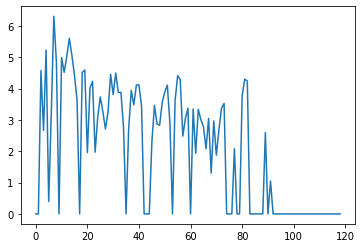

In [45]:
# 看一下数量的分布
print('所有元素的分布（取对数）')
list_q = []
for i in count_ele_dict:
    list_q.append(count_ele_dict[i])
plt.plot(range(len(list_q)),list_q)

In [46]:
len(count_ele_dict)

119

In [47]:
label = [' ' for i in range(9*18+10)]


In [48]:
periodic_table[103]

'Rf'

In [49]:
group_H = ['H','C','N','O','P','S','Se']

group_Li = [ 'Li', 'Na', 'K', 'Rb', 'Cs', 'Fr'] #orange

group_Be = ['Be', 'Mg', 'Ca', 'Sr', 'Ba', 'Ra'] # yellow

group_Al = [ 'Al', 'Ga', 'In', 'Tl', 'Nh','Sn', 'Pb', 'Fl','Bi', 'Mc','Lv'] # 金属

group_B = ['B', 'Si', 'Ge', 'As','Sb' ,'Te', 'Po']

group_F = ['F', 'Cl', 'Br', 'I', 'At', 'Ts']  # 红

group_He = ['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Rn', 'Og'] # 灰

group_la = [i for i in periodic_table[56:71]]

group_ac = [i for i in periodic_table[88:103]]

In [50]:
color_dict ={ele:'white' for ele in periodic_table} 
# 再加个‘ ’
color_dict[' '] = 'white'
for i in group_H:
    color_dict[i] = 'Green'
for i in group_Li:
    color_dict[i] = 'Pink'
for i in group_Be:
    color_dict[i] = 'purple'
for i in group_Al:
    color_dict[i] = 'Orange'
for i in group_B:
    color_dict[i] = 'Yellow'
for i in group_F:
    color_dict[i] = 'Red'
for i in group_He:
    color_dict[i] = 'Gray'
for i in group_ac:
    color_dict[i] = 'Brown'
for i in group_la:
    color_dict[i] = 'Teal'
for i in periodic_table:
    if i not in group_H and i not in group_Li and i not in group_Be and i not in group_Al and i not in group_B and i not in group_F and i not in group_He and i not in group_ac and i not in group_la:
         color_dict[i] = 'Cyan'

In [51]:
color_dict

{'H': 'Green',
 'He': 'Gray',
 'Li': 'Pink',
 'Be': 'purple',
 'B': 'Yellow',
 'C': 'Green',
 'N': 'Green',
 'O': 'Green',
 'F': 'Red',
 'Ne': 'Gray',
 'Na': 'Pink',
 'Mg': 'purple',
 'Al': 'Orange',
 'Si': 'Yellow',
 'P': 'Green',
 'S': 'Green',
 'Cl': 'Red',
 'Ar': 'Gray',
 'K': 'Pink',
 'Ca': 'purple',
 'Sc': 'Cyan',
 'Ti': 'Cyan',
 'V': 'Cyan',
 'Cr': 'Cyan',
 'Mn': 'Cyan',
 'Fe': 'Cyan',
 'Co': 'Cyan',
 'Ni': 'Cyan',
 'Cu': 'Cyan',
 'Zn': 'Cyan',
 'Ga': 'Orange',
 'Ge': 'Yellow',
 'As': 'Yellow',
 'Se': 'Green',
 'Br': 'Red',
 'Kr': 'Gray',
 'Rb': 'Pink',
 'Sr': 'purple',
 'Y': 'Cyan',
 'Zr': 'Cyan',
 'Nb': 'Cyan',
 'Mo': 'Cyan',
 'Tc': 'Cyan',
 'Ru': 'Cyan',
 'Rh': 'Cyan',
 'Pd': 'Cyan',
 'Ag': 'Cyan',
 'Cd': 'Cyan',
 'In': 'Orange',
 'Sn': 'Orange',
 'Sb': 'Yellow',
 'Te': 'Yellow',
 'I': 'Red',
 'Xe': 'Gray',
 'Cs': 'Pink',
 'Ba': 'purple',
 'La': 'Teal',
 'Ce': 'Teal',
 'Pr': 'Teal',
 'Nd': 'Teal',
 'Pm': 'Teal',
 'Sm': 'Teal',
 'Eu': 'Teal',
 'Gd': 'Teal',
 'Tb': 'Teal',
 'Dy

In [52]:
label[1] = 'H'
label[18] = 'He'
label[19],label[20],label[31],label[32],label[33],label[34],label[35],label[36] = 'Li','Be','B','C','N','O','F','Ne'
label[37],label[38] = 'Na','Mg'
for i in range(93-49):
    label[i+49] =  periodic_table[12+i]
for i in range(88-72+1):
    label[i+94] = periodic_table[71+i]
for i in range(118-104+1):
    label[i+112] = periodic_table[i+103]
for i in range(71-57+1):
    label[i+128] = periodic_table[i+56]
for i in range(103-89+1):
    label[i+146] = periodic_table[i+88]

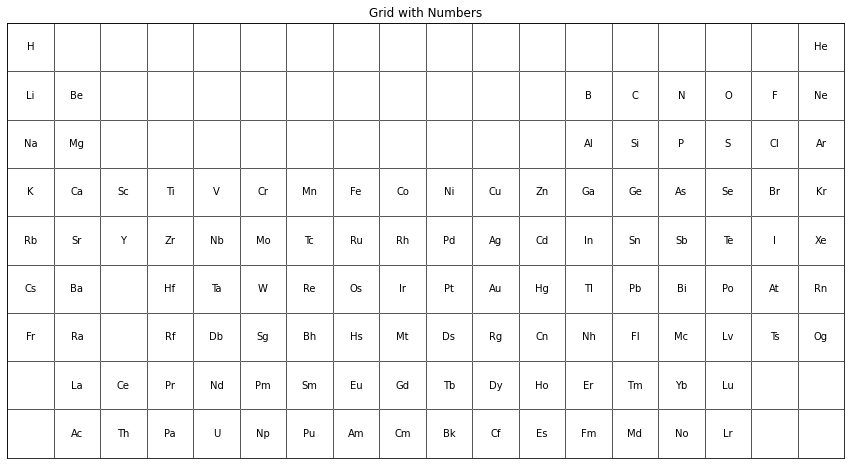

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个9行18列的方格图
rows = 9
cols = 18

# 创建一个新的图表和子图
fig, ax = plt.subplots(figsize=(15, 8))

# 绘制方格
for row in range(rows):
    for col in range(cols):
        # 计算方格的编号
        cell_number = row * cols + col + 1
        
        # 绘制方格
        rect = plt.Rectangle((col, rows - row - 1), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
        ax.add_patch(rect)
        
        # 在方格内部标上编号
        ax.text(col + 0.5, rows - row - 0.5, str(label[cell_number]), ha='center', va='center', fontsize=10)

# 设置坐标轴
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)
ax.set_xticks(np.arange(0, cols + 1, 1))
ax.set_yticks(np.arange(0, rows + 1, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])

# 设置标题
plt.title('Grid with Numbers')

# 移除所有刻度线
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.show()


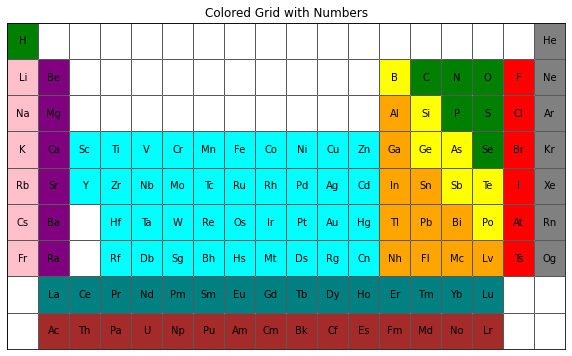

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个9行18列的方格图
rows = 9
cols = 18

# 创建一个新的图表和子图
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制方格并上色
for row in range(rows):
    for col in range(cols):
        # 计算方格的编号
        cell_number = row * cols + col + 1
        
        # 计算颜色值，范围从0到1
        color_value = (cell_number % 100) / 100
        
        # 绘制带有填充颜色的方格
        rect = plt.Rectangle((col, rows - row - 1), 1, 1, linewidth=1, edgecolor='black', facecolor=color_dict[label[cell_number]])
        ax.add_patch(rect)
        
        # 在方格内部标上编号
        ax.text(col + 0.5, rows - row - 0.5, str(label[cell_number]), ha='center', va='center', fontsize=10, color='Black')

# 设置坐标轴
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)
ax.set_xticks(np.arange(0, cols + 1, 1))
ax.set_yticks(np.arange(0, rows + 1, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])

# 设置标题
plt.title('Colored Grid with Numbers')

# 移除所有刻度线
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.show()


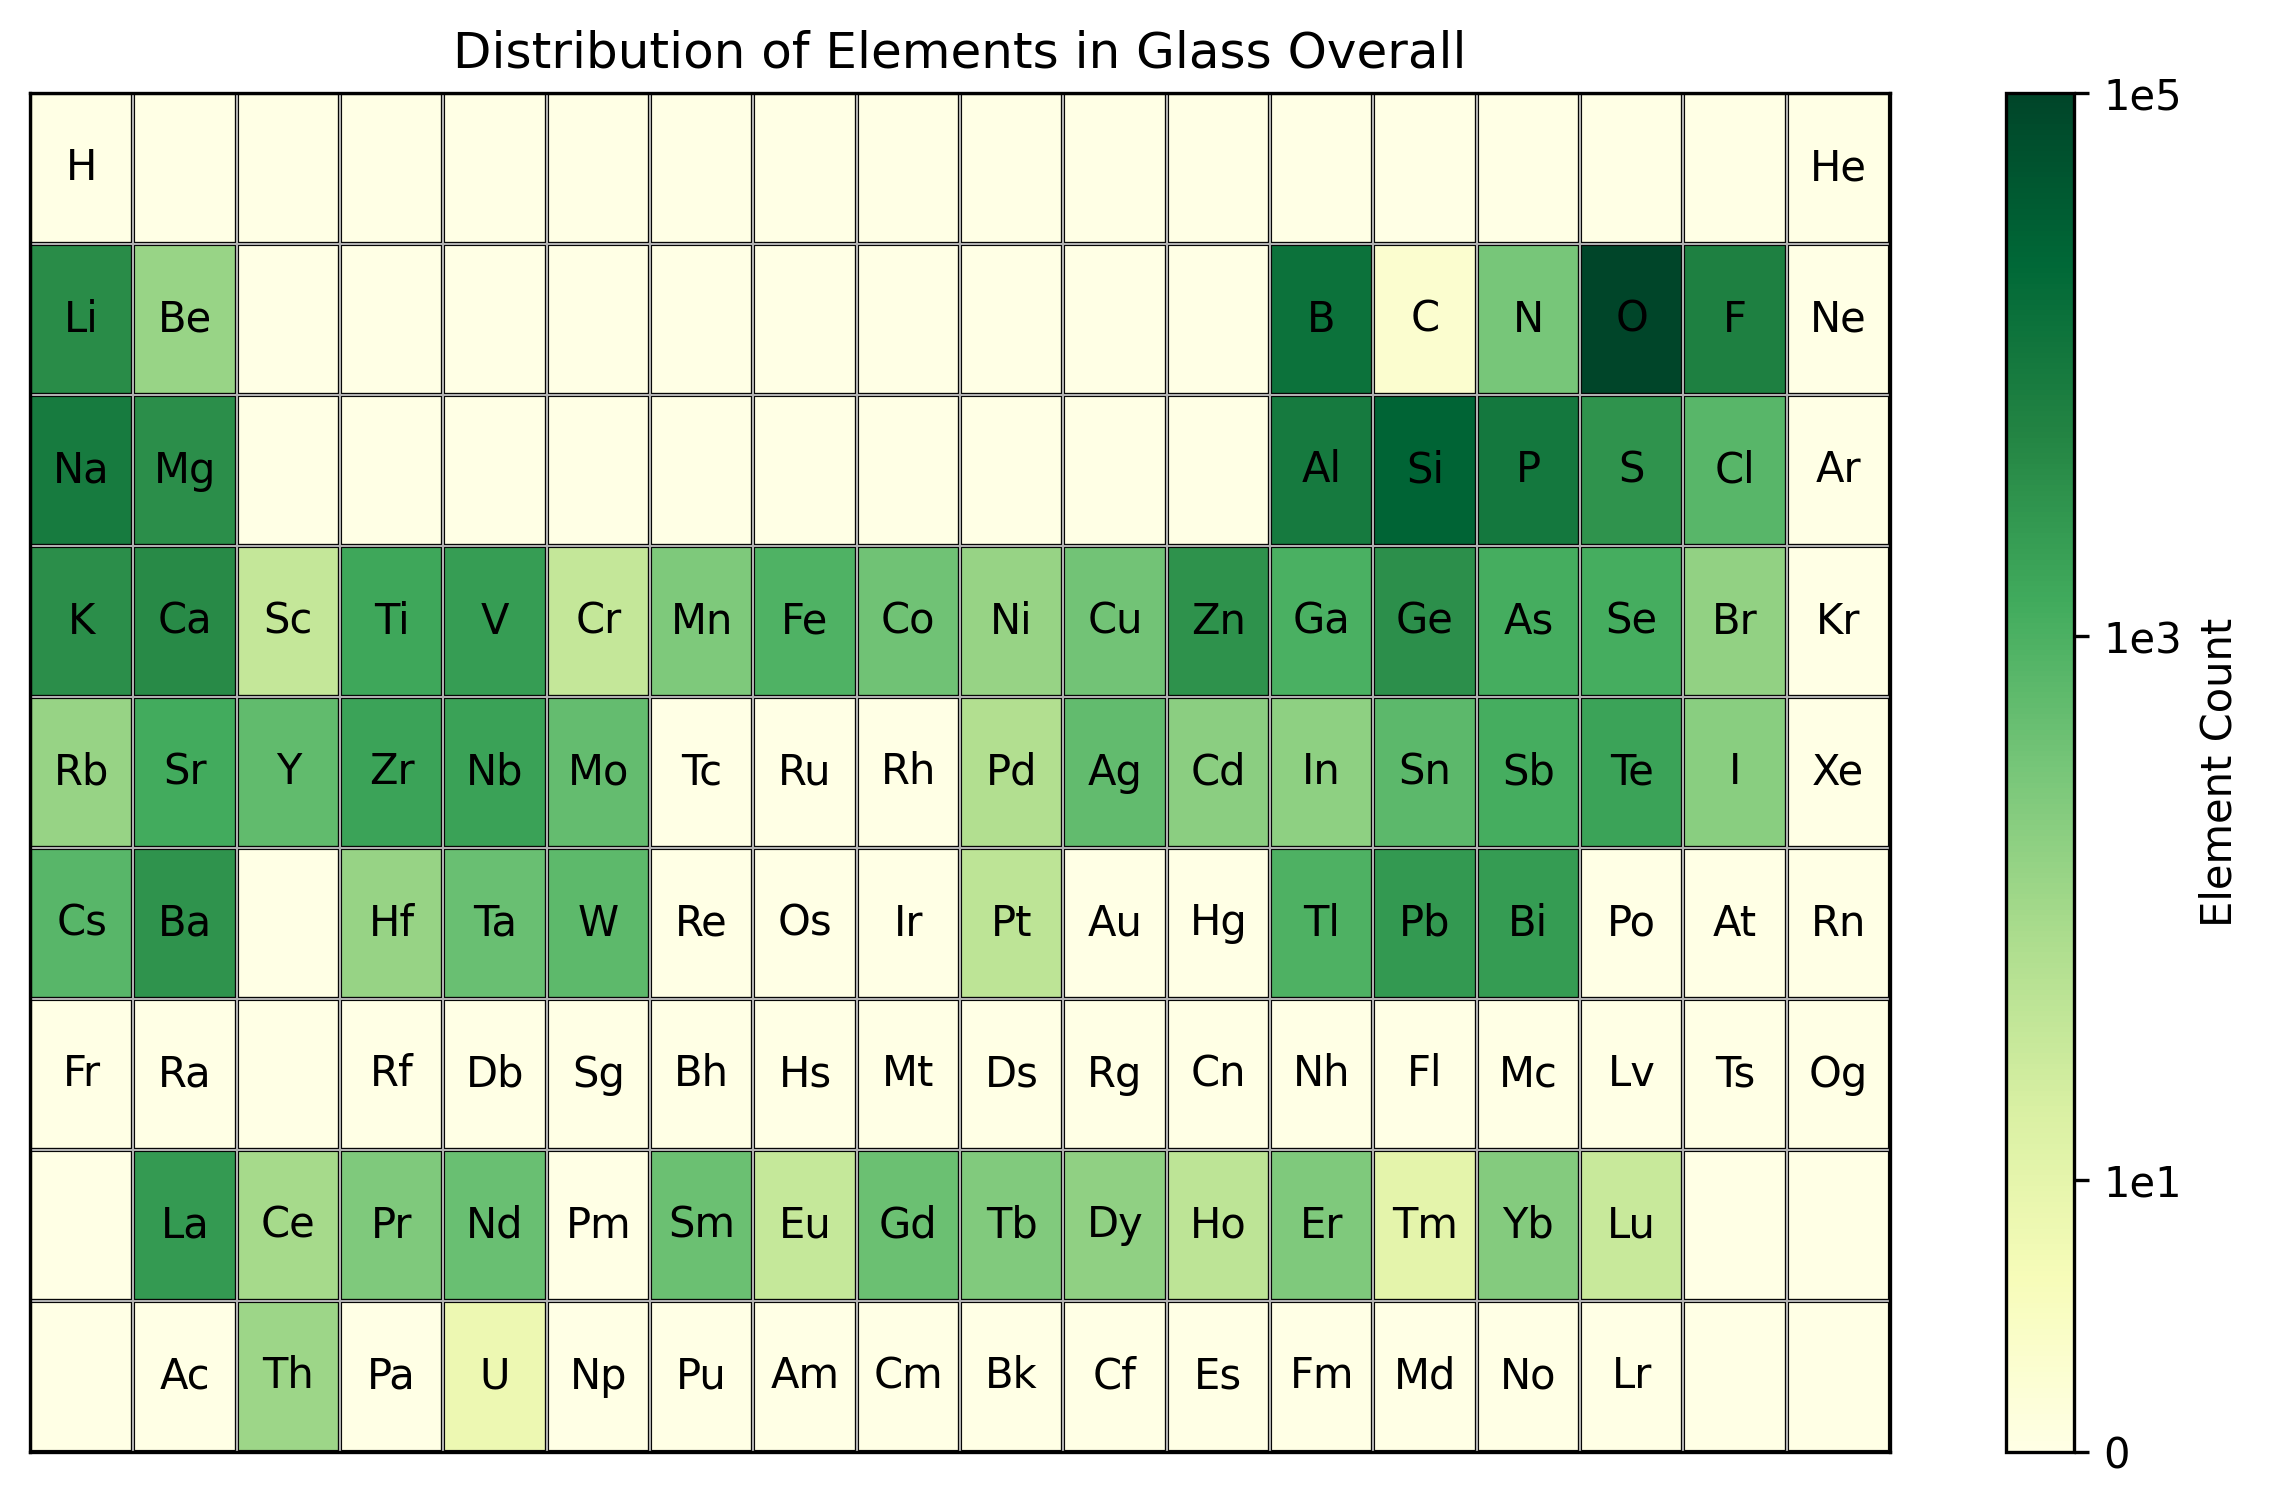

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# 创建一个9行18列的方格图
rows = 9
cols = 18

# 生成一些示例数值（范围从0到100）
values = np.random.randint(0, 101, size=(rows, cols))

# 创建一个颜色映射，从淡黄色到深绿色
cmap = cm.get_cmap('YlGn')

# 创建一个新的图表和子图
fig, ax = plt.subplots(figsize=(10, 6))
# 设置图像的DPI为300
fig.dpi = 300
# 绘制方格并上色，根据数值大小映射颜色
for row in range(rows):
    for col in range(cols):
        # 计算方格的编号
        cell_number = row * cols + col + 1
        
        # 计算颜色值，范围从0到1
        # print(label[cell_number])
        color_value = count_ele_dict[label[cell_number]]/max_count
        facecolor = cmap(color_value)
        # 有元素但是这个元素值为0的设置为灰色
        if label[cell_number] in periodic_table and  count_ele_dict[label[cell_number]]==0:
            
            pass#facecolor= 'lightgray'
        # 绘制带有填充颜色的方格
        rect = plt.Rectangle((col, rows - row - 1), 1, 1, linewidth=1, edgecolor='black', facecolor=facecolor)
        ax.add_patch(rect)
        
        # 在方格内部标上编号
        ax.text(col + 0.5, rows - row - 0.5, str(label[cell_number]), ha='center', va='center', fontsize=10, color='Black')

# 设置坐标轴
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)
ax.set_xticks(np.arange(0, cols + 1, 1))
ax.set_yticks(np.arange(0, rows + 1, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])

# 设置标题
plt.title('Distribution of Elements in Glass Overall')

# 移除所有刻度线
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

plt.grid(True, which='both', linestyle='-', linewidth=0.5)

# 添加颜色映射的颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Element Count')
# 设置颜色条的标识
cbar.set_ticks([0,np.log10(1e1)/np.log10(1e5),np.log10(1e3)/np.log10(1e5), np.log10(1e5)/np.log10(1e5)])  # 自定义标识的位置
cbar.set_ticklabels(['0','1e1', '1e3', '1e5'])  # 自定义标识的标签

plt.show()


In [56]:
np.log10(1e5)

5.0

# 然后对label进行分布分析

In [57]:
full_data.iloc[:2,-3:]

,Density at RT ( g/cm3 ),Expansion Coeff (Typical) ( 10-7/K ),Glass Transition Tg (Typical) ( C )
0,4.306,122.0,399.0
1,4.594,123.0,382.0


In [58]:
full_data.columns

Index([' SiO2', ' B2O3', ' Al2O3', ' MgO', ' CaO', ' BaO', ' Li2O', ' Na2O',
       ' K2O', ' Cu2O',
       ...
       ' GeS', ' AlN', ' Si3N4', ' BN', ' TiO', ' Mg3N2', ' Na2B4O7',
       ' Density at RT ( g/cm3 )', ' Expansion Coeff (Typical) ( 10-7/K )',
       ' Glass Transition Tg (Typical) ( C )'],
      dtype='object', length=230)

In [59]:
# label_1为density
label_list1 = []
for i in full_data[' Density at RT ( g/cm3 )']:
#     # 改一改异常值
#     if i>=15.85:
#         i=15.85
#     if i<1.0:
#         print(i)
    
    label_list1.append(i)
min_label_1,max_label_1 = min(label_list1),max(label_list1)
print(min_label_1, max_label_1)

1.607 15.85


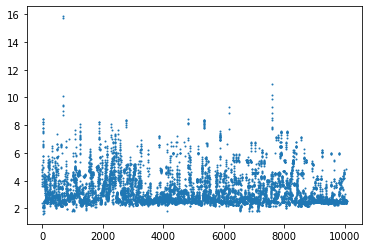

In [60]:
plt.scatter(range(len(label_list1)),label_list1, s=1)

In [62]:
# 转化为标准的值  初始化
label_list1 = np.array(label_list1)
mean_1,delta_1 = label_list1.mean(), label_list1.std()
print(mean_1,delta_1)

3.2659027748831657 1.123099899704337


In [63]:
normal_label_1 = (label_list1-mean_1)/delta_1

In [64]:
len(normal_label_1)

10057

In [65]:
normal_label_1.std()

1.0000000000000002

In [66]:
normal_label_1.mean()

2.147807414448349e-16

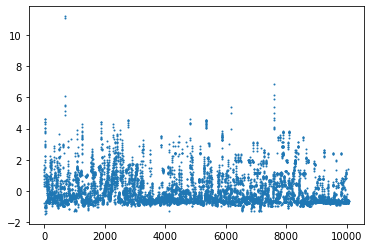

In [67]:
plt.scatter(range(len(normal_label_1)),normal_label_1, s=1)

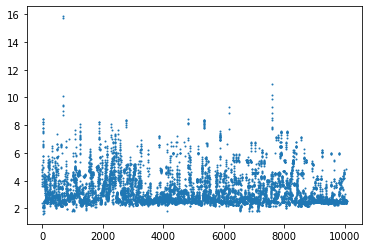

In [68]:
plt.scatter(range(len(label_list1)),label_list1, s=1)

# 直接训练得到泊松比

In [75]:
len(label_list1)

10057

In [76]:
# 生成坐标
element_order_dic = {}
for i in range(len(label)):
    if label[i]!=' ':
        element_order_dic[label[i]]=i-1
print(element_order_dic)
element_order_dic_2d = {}
for i in element_order_dic:
    element_order_dic_2d[i]=[element_order_dic[i]//18,element_order_dic[i]%18]
print(element_order_dic_2d)

{'H': 0, 'He': 17, 'Li': 18, 'Be': 19, 'B': 30, 'C': 31, 'N': 32, 'O': 33, 'F': 34, 'Ne': 35, 'Na': 36, 'Mg': 37, 'Al': 48, 'Si': 49, 'P': 50, 'S': 51, 'Cl': 52, 'Ar': 53, 'K': 54, 'Ca': 55, 'Sc': 56, 'Ti': 57, 'V': 58, 'Cr': 59, 'Mn': 60, 'Fe': 61, 'Co': 62, 'Ni': 63, 'Cu': 64, 'Zn': 65, 'Ga': 66, 'Ge': 67, 'As': 68, 'Se': 69, 'Br': 70, 'Kr': 71, 'Rb': 72, 'Sr': 73, 'Y': 74, 'Zr': 75, 'Nb': 76, 'Mo': 77, 'Tc': 78, 'Ru': 79, 'Rh': 80, 'Pd': 81, 'Ag': 82, 'Cd': 83, 'In': 84, 'Sn': 85, 'Sb': 86, 'Te': 87, 'I': 88, 'Xe': 89, 'Cs': 90, 'Ba': 91, 'Hf': 93, 'Ta': 94, 'W': 95, 'Re': 96, 'Os': 97, 'Ir': 98, 'Pt': 99, 'Au': 100, 'Hg': 101, 'Tl': 102, 'Pb': 103, 'Bi': 104, 'Po': 105, 'At': 106, 'Rn': 107, 'Fr': 108, 'Ra': 109, 'Rf': 111, 'Db': 112, 'Sg': 113, 'Bh': 114, 'Hs': 115, 'Mt': 116, 'Ds': 117, 'Rg': 118, 'Cn': 119, 'Nh': 120, 'Fl': 121, 'Mc': 122, 'Lv': 123, 'Ts': 124, 'Og': 125, 'La': 127, 'Ce': 128, 'Pr': 129, 'Nd': 130, 'Pm': 131, 'Sm': 132, 'Eu': 133, 'Gd': 134, 'Tb': 135, 'Dy': 136

In [77]:
feature = []
# 从组分列表里得出元素的ptr图
for com in range(col_count):
    temp_sum = 0
    cal_com_percentage = {ele:0.0 for ele in periodic_table} # 原表不变，这个用来生成ptr
    for i in element_dict:
        value = element_dict[i][com]
        if value!=0:
            #print(value)
            temp_sum += value
    for i in element_dict:
        value = element_dict[i][com]
        if value!=0:
            cal_com_percentage[i] = value/temp_sum
    # 已经获得了一帧的数据，再将数据写成ptr格式，存入list
    one_frame = np.zeros((9, 18), dtype=float)
    # 或者元素对应的坐标值
    for i in cal_com_percentage:
        if cal_com_percentage[i]!=0:
            [x,y] = element_order_dic_2d[i]
            one_frame[x,y]=cal_com_percentage[i]
    feature.append(one_frame)

In [83]:
feature[999]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.05256694, 0.        , 0.        ,
        0.66664912, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.2104432 ,
        0.        , 0.        , 0.        ],
       [0.03505632, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01752816, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
    

In [84]:
def non_zero_indices(matrix):
    indices = []
    for row_idx, row in enumerate(matrix):
        for col_idx, value in enumerate(row):
            if value != 0:
                indices.append((row_idx, col_idx))
    return indices

In [92]:
for i in element_dict:
    if element_dict[i][999]!=0.0:
        print(i,element_dict[i][0])

B 0.0
O 332.9
P 88.6
K 0.0
Zn 0.0
La 0.0
Nd 0.0


In [89]:
non_zero_indices(feature[999])

[(1, 12), (1, 15), (2, 14), (3, 0), (3, 11), (7, 1), (7, 4)]

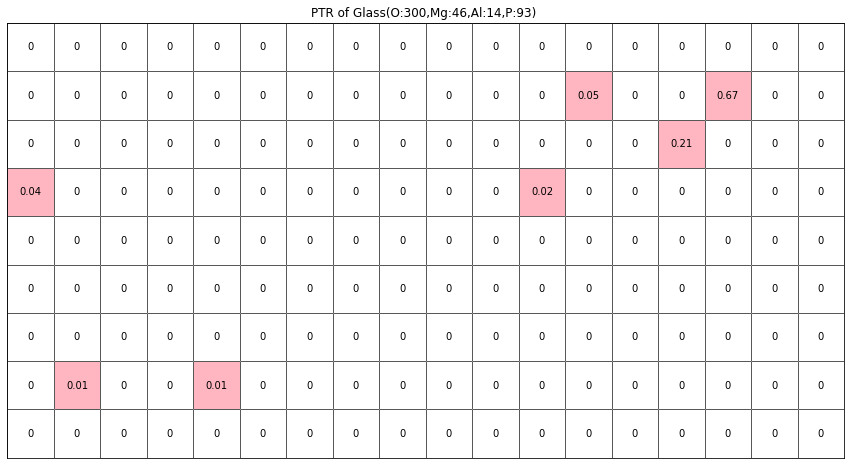

In [91]:
# 创建一个9行18列的方格图
rows = 9
cols = 18
draw_list = feature[999]
# 创建一个新的图表和子图
fig, ax = plt.subplots(figsize=(15, 8))

# 绘制方格
for row in range(rows):
    for col in range(cols):
        # 计算方格的编号
        cell_number = row * cols + col + 1
        # 设置输出的值
        facecolor='white'
        print_value = 0
        if draw_list[row][col]!=0:
            print_value = round(draw_list[row][col],2)
            facecolor = 'lightpink'
        # 绘制方格
        rect = plt.Rectangle((col, rows - row - 1), 1, 1, linewidth=1, edgecolor='black', facecolor=facecolor)
        ax.add_patch(rect)
        
        # 在方格内部标上编号
        ax.text(col + 0.5, rows - row - 0.5, str(print_value), ha='center', va='center', fontsize=10)

# 设置坐标轴
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)
ax.set_xticks(np.arange(0, cols + 1, 1))
ax.set_yticks(np.arange(0, rows + 1, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])

# 设置标题
plt.title('PTR of Glass(O:300,Mg:46,Al:14,P:93) ')

# 移除所有刻度线
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.show()


In [93]:
# 说明生成的ptr表正确
print(len(feature))

10057


# 建立网络开始训练

In [208]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import copy
from sklearn.model_selection import KFold

In [222]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  # Batch Normalization layer
        self.relu = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  # Batch Normalization layer
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)  # Batch Normalization layer
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(64*2, 64)
        self.fc2 = nn.Linear(64, 1)  # 输出一个回归值

    def forward(self, x):
        x = self.pool1(self.relu(self.bn1(self.conv1(x))))
        #print(x.shape)
        x = self.pool2(self.relu(self.bn2(self.conv2(x))))
        #print(x.shape)
        x = self.pool3(self.relu(self.bn3(self.conv3(x))))
        #print(x.shape)
        x = x.view(x.size(0), -1)  
        #print(x.shape)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [223]:
def train_model(model, train_loader, optimizer, criterion, num_epochs):
    loss_list = []
    for epoch in range(num_epochs):
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            #print(len(inputs))
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
        loss_list.append([epoch,loss.item()])
    return loss_list

# 先将处理好的数据进行保存

In [224]:
save_path = r'./'
np.save('new_m.npy',feature)
np.save('water_label.npy',label_list1)

In [233]:
# 假设你有一个名为'features'和'targets'的数据
temp_feature = copy.deepcopy(feature)
features = np.array(temp_feature)[:, np.newaxis, :, :]
targets =  label_list1
# 超参数
num_epochs = 50
batch_size = 128
learning_rate = 0.001

# 实例化模型
model = CNN()

# 转换为PyTorch的张量
features = torch.tensor(features, dtype=torch.float32)
targets = torch.tensor(targets, dtype=torch.float32)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [234]:
features.shape

torch.Size([10057, 1, 9, 18])

In [235]:
targets.shape

torch.Size([10057])

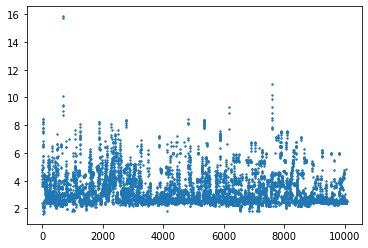

In [236]:
plt.scatter(range(len(targets)),targets, s=2)

In [237]:
# 手动训练和验证
# 根据所需的比例计算切分点
split_ratio = 0.8

# 设置随机种子以确保结果可重现
np.random.seed(42)

# 随机打乱数据顺序
indices = np.arange(len(targets))
np.random.shuffle(indices)

# 根据打乱后的索引顺序获取特征数据和标签数据
X_shuffled = features[indices]
y_shuffled = targets[indices]

split_point = int(len(features) * split_ratio)

# 根据打乱后的顺序将数据划分为训练集和测试集
train_features = X_shuffled[:split_point]
train_targets  = y_shuffled[:split_point]

val_features  = X_shuffled[split_point:]
val_targets   = y_shuffled[split_point:]


# 创建数据加载器
train_dataset = torch.utils.data.TensorDataset(train_features, train_targets)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [238]:
len(train_features)

8045

In [239]:
len(val_features)

2012

In [240]:
# 训练模型
loss_list = train_model(model, train_loader, optimizer, criterion, num_epochs)  

D:\python_install\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\python_install\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([109])) that is different to the input size (torch.Size([109, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/50], Loss: 1.2592
Epoch [2/50], Loss: 1.1938
Epoch [3/50], Loss: 1.7363
Epoch [4/50], Loss: 1.3356
Epoch [5/50], Loss: 1.1431
Epoch [6/50], Loss: 1.5275
Epoch [7/50], Loss: 1.8703
Epoch [8/50], Loss: 3.7150
Epoch [9/50], Loss: 1.3858
Epoch [10/50], Loss: 1.2861
Epoch [11/50], Loss: 1.1952
Epoch [12/50], Loss: 1.3699
Epoch [13/50], Loss: 1.6473
Epoch [14/50], Loss: 1.2650
Epoch [15/50], Loss: 1.7396
Epoch [16/50], Loss: 1.2241
Epoch [17/50], Loss: 0.9014
Epoch [18/50], Loss: 0.9363
Epoch [19/50], Loss: 0.9984
Epoch [20/50], Loss: 1.3220
Epoch [21/50], Loss: 1.1600
Epoch [22/50], Loss: 1.6254
Epoch [23/50], Loss: 1.3506
Epoch [24/50], Loss: 1.1629
Epoch [25/50], Loss: 1.1725
Epoch [26/50], Loss: 1.2434
Epoch [27/50], Loss: 1.6976
Epoch [28/50], Loss: 1.2406
Epoch [29/50], Loss: 1.0743
Epoch [30/50], Loss: 1.4227
Epoch [31/50], Loss: 0.9980
Epoch [32/50], Loss: 1.0116
Epoch [33/50], Loss: 0.9579
Epoch [34/50], Loss: 1.1347
Epoch [35/50], Loss: 1.1171
Epoch [36/50], Loss: 1.3115
E

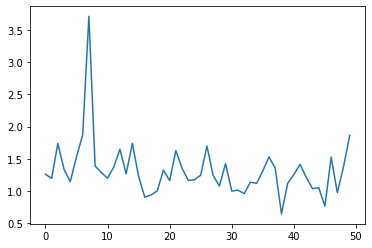

In [241]:
loss_list = np.array(loss_list)
plt.plot(loss_list[:,0],loss_list[:,1])

In [242]:
# 手动验证
pre_list = []
# 在验证集上进行评估
with torch.no_grad():
    model2.eval()
    val_outputs = model2(val_features)
    pre_list.append(val_outputs)
    val_loss = criterion(val_outputs, val_targets)
    print(f"Validation Loss: {val_loss.item():.4f}")

Validation Loss: 1.1568


In [243]:
len(train_features)

8045

In [244]:
len(val_targets)

2012

In [245]:
# 将Tensor元素转换为NumPy数组，并展平为一维数组
pre_list = np.concatenate([tensor.numpy().ravel() for tensor in pre_list])
print(len(pre_list))

2012


In [246]:
# 计算R平方
from sklearn.metrics import r2_score

# 假设 y_true 是真实标签，y_pred 是模型预测值
r2 = r2_score(val_targets, pre_list)

print("R-squared:", r2)

R-squared: 0.011331428256241338


In [247]:
# 初始化K折交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=25)

for fold, (train_index, val_index) in enumerate(kf.split(features)):
    print(f"Fold {fold + 1}")
    
    # 划分训练集和验证集
    train_features, val_features = features[train_index], features[val_index]
    train_targets, val_targets = targets[train_index], targets[val_index]
    
    # 创建模型实例
    model = CNN()
    
    # 创建数据加载器
    train_dataset = torch.utils.data.TensorDataset(train_features, train_targets)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # 训练模型
    train_model(model, train_loader, optimizer, criterion, num_epochs)
    
    # 在验证集上进行评估
    with torch.no_grad():
        model.eval()
        val_outputs = model(val_features)
        val_loss = criterion(val_outputs, val_targets)
        print(f"Validation Loss: {val_loss.item():.4f}")


Fold 1


D:\python_install\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\python_install\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([109])) that is different to the input size (torch.Size([109, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/50], Loss: 9.4721
Epoch [2/50], Loss: 9.9759
Epoch [3/50], Loss: 10.3686
Epoch [4/50], Loss: 9.6482
Epoch [5/50], Loss: 9.8468
Epoch [6/50], Loss: 10.4330
Epoch [7/50], Loss: 10.9894
Epoch [8/50], Loss: 11.5896
Epoch [9/50], Loss: 10.6386
Epoch [10/50], Loss: 9.7274
Epoch [11/50], Loss: 9.1778
Epoch [12/50], Loss: 9.7774
Epoch [13/50], Loss: 9.4624
Epoch [14/50], Loss: 9.7993
Epoch [15/50], Loss: 9.9512
Epoch [16/50], Loss: 9.8461
Epoch [17/50], Loss: 9.9551
Epoch [18/50], Loss: 11.0335
Epoch [19/50], Loss: 9.4392
Epoch [20/50], Loss: 10.8758
Epoch [21/50], Loss: 9.0720
Epoch [22/50], Loss: 9.9162
Epoch [23/50], Loss: 10.5886
Epoch [24/50], Loss: 10.9717
Epoch [25/50], Loss: 9.5388
Epoch [26/50], Loss: 10.4926
Epoch [27/50], Loss: 11.1257
Epoch [28/50], Loss: 9.1874
Epoch [29/50], Loss: 9.7575
Epoch [30/50], Loss: 11.9003
Epoch [31/50], Loss: 12.5304
Epoch [32/50], Loss: 9.8823
Epoch [33/50], Loss: 11.4933
Epoch [34/50], Loss: 10.2004
Epoch [35/50], Loss: 10.2048
Epoch [36/50]

D:\python_install\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([2012])) that is different to the input size (torch.Size([2012, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/50], Loss: 11.8518
Epoch [2/50], Loss: 11.2721
Epoch [3/50], Loss: 11.6669
Epoch [4/50], Loss: 10.6953
Epoch [5/50], Loss: 10.9314
Epoch [6/50], Loss: 11.7898
Epoch [7/50], Loss: 11.0691
Epoch [8/50], Loss: 11.7744
Epoch [9/50], Loss: 11.8131
Epoch [10/50], Loss: 12.0080
Epoch [11/50], Loss: 11.7101
Epoch [12/50], Loss: 11.3895
Epoch [13/50], Loss: 10.6767
Epoch [14/50], Loss: 10.4288
Epoch [15/50], Loss: 11.3695
Epoch [16/50], Loss: 11.4292
Epoch [17/50], Loss: 10.8990
Epoch [18/50], Loss: 11.7742
Epoch [19/50], Loss: 11.5048
Epoch [20/50], Loss: 12.7239
Epoch [21/50], Loss: 10.3846
Epoch [22/50], Loss: 11.8216
Epoch [23/50], Loss: 10.7385
Epoch [24/50], Loss: 12.6551
Epoch [25/50], Loss: 11.5224
Epoch [26/50], Loss: 11.5421
Epoch [27/50], Loss: 10.4563
Epoch [28/50], Loss: 12.5517
Epoch [29/50], Loss: 11.8391
Epoch [30/50], Loss: 10.9259
Epoch [31/50], Loss: 9.8495
Epoch [32/50], Loss: 11.5231
Epoch [33/50], Loss: 12.8805
Epoch [34/50], Loss: 11.9856
Epoch [35/50], Loss: 11.

D:\python_install\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([110])) that is different to the input size (torch.Size([110, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/50], Loss: 9.4010
Epoch [2/50], Loss: 9.0553
Epoch [3/50], Loss: 8.3505
Epoch [4/50], Loss: 8.3533
Epoch [5/50], Loss: 8.8867
Epoch [6/50], Loss: 7.8412
Epoch [7/50], Loss: 8.2680
Epoch [8/50], Loss: 9.5236
Epoch [9/50], Loss: 8.2641
Epoch [10/50], Loss: 10.4554
Epoch [11/50], Loss: 9.2824
Epoch [12/50], Loss: 9.1378
Epoch [13/50], Loss: 8.6796
Epoch [14/50], Loss: 7.8347
Epoch [15/50], Loss: 9.3311
Epoch [16/50], Loss: 8.6565
Epoch [17/50], Loss: 8.5012
Epoch [18/50], Loss: 12.0921
Epoch [19/50], Loss: 9.5146
Epoch [20/50], Loss: 8.8588
Epoch [21/50], Loss: 9.1862
Epoch [22/50], Loss: 9.0551
Epoch [23/50], Loss: 8.3291
Epoch [24/50], Loss: 9.7366
Epoch [25/50], Loss: 7.5021
Epoch [26/50], Loss: 10.2636
Epoch [27/50], Loss: 10.5883
Epoch [28/50], Loss: 9.3890
Epoch [29/50], Loss: 7.9298
Epoch [30/50], Loss: 8.4544
Epoch [31/50], Loss: 8.2929
Epoch [32/50], Loss: 8.5982
Epoch [33/50], Loss: 9.2054
Epoch [34/50], Loss: 10.1378
Epoch [35/50], Loss: 8.8380
Epoch [36/50], Loss: 8.3

D:\python_install\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([2011])) that is different to the input size (torch.Size([2011, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/50], Loss: 12.6166
Epoch [2/50], Loss: 10.8480
Epoch [3/50], Loss: 10.3135
Epoch [4/50], Loss: 10.4817
Epoch [5/50], Loss: 11.0731
Epoch [6/50], Loss: 10.7464
Epoch [7/50], Loss: 11.6558
Epoch [8/50], Loss: 8.9912
Epoch [9/50], Loss: 11.2510
Epoch [10/50], Loss: 11.0150
Epoch [11/50], Loss: 11.4483
Epoch [12/50], Loss: 11.7138
Epoch [13/50], Loss: 11.4190
Epoch [14/50], Loss: 9.8577
Epoch [15/50], Loss: 8.8874
Epoch [16/50], Loss: 11.1690
Epoch [17/50], Loss: 10.9066
Epoch [18/50], Loss: 11.1072
Epoch [19/50], Loss: 11.3398
Epoch [20/50], Loss: 10.8537
Epoch [21/50], Loss: 11.6353
Epoch [22/50], Loss: 10.2823
Epoch [23/50], Loss: 11.7050
Epoch [24/50], Loss: 10.1553
Epoch [25/50], Loss: 10.5302
Epoch [26/50], Loss: 10.3509
Epoch [27/50], Loss: 11.0598
Epoch [28/50], Loss: 10.3999
Epoch [29/50], Loss: 13.3531
Epoch [30/50], Loss: 9.5079
Epoch [31/50], Loss: 10.7133
Epoch [32/50], Loss: 12.9006
Epoch [33/50], Loss: 10.3591
Epoch [34/50], Loss: 10.6321
Epoch [35/50], Loss: 10.979

# 结果就是很不稳定  再使用迁移学习试试

In [84]:
# 假设您的数据是 poisson_feature 和 poisson_label
# 将数据转换为Tensor

poisson_data = np.array(temp)[:, np.newaxis, :, :]
train_data = torch.Tensor(poisson_data)
train_labels = torch.Tensor(poisson_label)

# 创建数据集和数据加载器

dataset = torch.utils.data.TensorDataset(train_data, train_labels)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

NameError: name 'poisson_label' is not defined

In [771]:
# 查看data形状
sample_batch = next(iter(dataloader))
inputs, targets = sample_batch
print("Input batch shape:", inputs.shape)
print("Target batch shape:", targets.shape)

Input batch shape: torch.Size([64, 1, 9, 18])
Target batch shape: torch.Size([64])


In [773]:
# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [774]:
# Training loop
err_with_epochs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in dataloader:  # Assuming dataloader provides batches of inputs and labels
        optimizer.zero_grad()  # Zero the gradients
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backpropagation and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(dataloader)
    err_with_epochs.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {epoch_loss:.4f}")

print("Training finished")

D:\python_install\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\python_install\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([52])) that is different to the input size (torch.Size([52, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/50] - Loss: 0.1268
Epoch [2/50] - Loss: 0.0539
Epoch [3/50] - Loss: 0.0527
Epoch [4/50] - Loss: 0.0526
Epoch [5/50] - Loss: 0.0518
Epoch [6/50] - Loss: 0.0532
Epoch [7/50] - Loss: 0.0536
Epoch [8/50] - Loss: 0.0528
Epoch [9/50] - Loss: 0.0511
Epoch [10/50] - Loss: 0.0537
Epoch [11/50] - Loss: 0.0538
Epoch [12/50] - Loss: 0.0521
Epoch [13/50] - Loss: 0.0516
Epoch [14/50] - Loss: 0.0520
Epoch [15/50] - Loss: 0.0529
Epoch [16/50] - Loss: 0.0523
Epoch [17/50] - Loss: 0.0528
Epoch [18/50] - Loss: 0.0519
Epoch [19/50] - Loss: 0.0515
Epoch [20/50] - Loss: 0.0511
Epoch [21/50] - Loss: 0.0506
Epoch [22/50] - Loss: 0.0507
Epoch [23/50] - Loss: 0.0507
Epoch [24/50] - Loss: 0.0508
Epoch [25/50] - Loss: 0.0515
Epoch [26/50] - Loss: 0.0511
Epoch [27/50] - Loss: 0.0521
Epoch [28/50] - Loss: 0.0516
Epoch [29/50] - Loss: 0.0514
Epoch [30/50] - Loss: 0.0521
Epoch [31/50] - Loss: 0.0502
Epoch [32/50] - Loss: 0.0506
Epoch [33/50] - Loss: 0.0507
Epoch [34/50] - Loss: 0.0511
Epoch [35/50] - Loss: 0

Text(0.5, 1.0, 'loss with epochs')

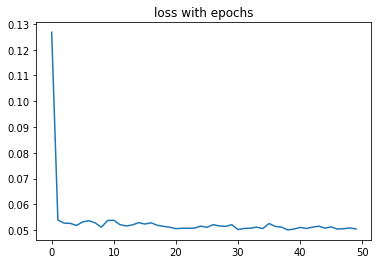

In [776]:
plt.plot(range(50),err_with_epochs)
plt.title('loss with epochs')

# 使用PADRE方法作数据增强处理